## Milestone 1

Dataset: https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

In [41]:
df = pd.read_csv('bank.csv')

# Looking at the unique jobs
drop_cols = [col for col in df.columns if col != 'job']
jobs = df.drop(columns=drop_cols)
jobs = jobs.drop_duplicates()

df.head(10)
#jobs


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [5]:
#Checking for null values
print(df.isnull().sum())
print(df['poutcome'].value_counts())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64


Text(0.5, 1.0, 'Age Distribution')

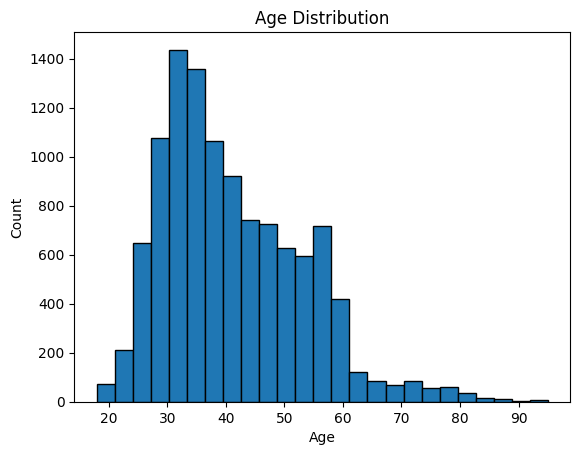

In [42]:
# Age distribution of the people that took part in the marketing campaign

plt.hist(df['age'], edgecolor='black', bins=25)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Age vs Balance')

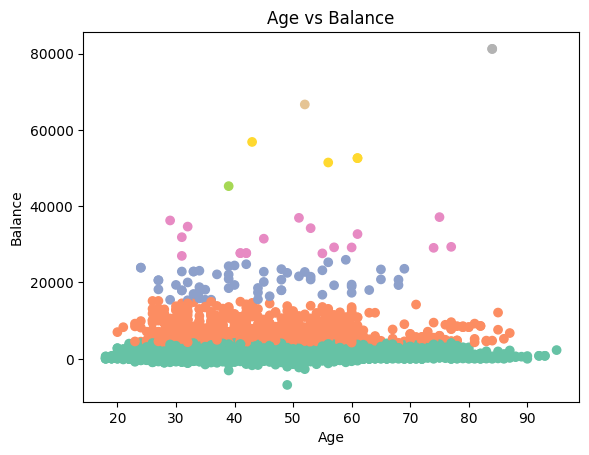

In [43]:
# Age vs balance plot
plt.scatter(df['age'], df['balance'], c = df['balance'], cmap='Set2')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Age vs Balance')

The data in general was pretty much cleaned before except for the outcome column where most of the values are unknown but there are enough successes, failures, and others to this column be relevant. Though I did find that there are some negative values for balance of certain jobs. Like management, entrepeneur and self-employed positions but since this does not create outliers that drastically affect the data, I am going to leave them in.

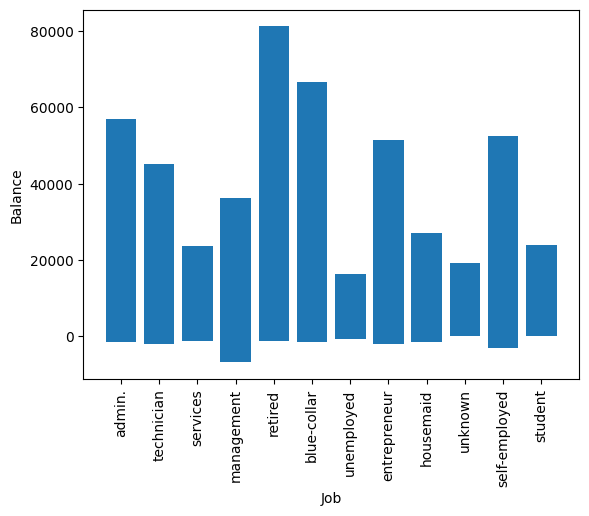

In [ ]:
#Job to balance graph
plt.bar(df['job'], df['balance'])
plt.xlabel('Job')
plt.ylabel('Balance')
plt.xticks(rotation=90)
plt.show()

In [38]:
#One hot encode categorical values as int
df = pd.get_dummies(df, columns=['job', 'marital', 'housing', 'loan', 'education', 'contact', 'month', 'poutcome', 'deposit', 'contact', 'default'])



In [39]:
df

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes
0,59,2343,5,1042,1,-1,0,True,False,False,...,False,False,True,False,True,False,False,True,True,False
1,56,45,5,1467,1,-1,0,True,False,False,...,False,False,True,False,True,False,False,True,True,False
2,41,1270,5,1389,1,-1,0,False,False,False,...,False,False,True,False,True,False,False,True,True,False
3,55,2476,5,579,1,-1,0,False,False,False,...,False,False,True,False,True,False,False,True,True,False
4,54,184,5,673,2,-1,0,True,False,False,...,False,False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,52,523,8,113,1,-1,0,False,False,False,...,False,False,True,True,False,True,False,False,True,False
11155,35,80,21,38,2,172,2,False,True,False,...,False,False,False,True,False,True,False,False,True,False
11157,33,1,20,257,1,-1,0,False,True,False,...,False,False,True,True,False,True,False,False,True,False
11158,39,733,16,83,4,-1,0,False,False,False,...,False,False,True,True,False,False,False,True,True,False


I went ahead and one hot encoded all of the categorical values so we can use them for the model.